In [20]:
import numpy as np
import scipy
from scipy.spatial.distance import hamming
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Wir wollen die vorprogrammierte SVM aus sklearn ausprobieren.
Dafür erstellen wir linear trennbare Toydaten in $mathbb{R}^2$

In [2]:
def initialize(l,n):
    data = 2*np.random.rand(l,n)-1  #create random data points uniformly distributed over [-1,1]^n
    rand_direction = np.random.rand(n)-0.5 #direction of seperating hyperplane
    rand_transition = 0.2*np.random.random() #transition of seperating hyperplane
    labels = np.array([np.dot(i,rand_direction) > rand_transition for i in data])
    return data, labels, rand_direction, rand_transition

[ 1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1
  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1]


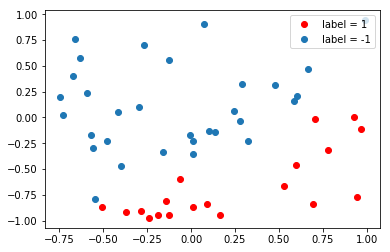

In [3]:
# fix random seed for reproducibility
seed = 2
np.random.seed(seed)
example_data, example_labels, example_rand_direction, example_rand_transition = initialize(50, 2)
example_data, example_labels, example_rand_direction, example_rand_transition
label1 = example_data[example_labels]
label0 = np.array(example_data[~example_labels])
#replace 0-labels with -1
example_labels = np.array([1 if x == True else -1 for x in example_labels])
fig1 = plt.figure()
p1, = plt.plot(label1[:,0], label1[:,1], 'ro', label = 'label = 1')
p2, = plt.plot( label0[:,0], label0[:,1], 'o', label = 'label = -1')
legend = plt.legend(handles = [p1, p2])
print(example_labels)

## Linear Kernel

In [6]:
C = 0.1
my_svm = sklearn.svm.SVC(C=C, kernel='linear')
my_svm.fit(example_data, example_labels)

AttributeError: module 'sklearn' has no attribute 'svm'

In [5]:
#get seperating hyperplane
w = my_svm.coef_[0]
m = -w[0] / w[1]   #Steigung der Funktionsgleichung, die die decision boundary beschreibt
x = np.linspace(-1, 1)
b = my_svm.intercept_[0]   #transition of hyperplane
y = m * x - b / w[1]

fig5 = plt.figure()
plt.plot(x, y, 'k-')
p1, = plt.plot(label1[:,0], label1[:,1], 'ro', label = 'label = 1')
p2, = plt.plot( label0[:,0], label0[:,1], 'o', label = 'label = -1')
legend = plt.legend(handles = [p1, p2])

#get margin
margin = 1 / np.linalg.norm(w)
#lower_margin = y + m * margin
#upper_margin = y - m * margin
lower_margin = y + np.sqrt(m**2+1)* margin
upper_margin = y - np.sqrt(m**2+1) * margin

plt.plot(x, y, 'k-', x, lower_margin, 'k--', x,upper_margin, 'k--')

#get support vectors
supp_vectors = my_svm.support_vectors_
plt.scatter(supp_vectors[:,0], supp_vectors[:,1], s=100, facecolors = 'none')

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('C = '+str(C))

NameError: name 'my_svm' is not defined

In [2]:
fig2

NameError: name 'fig2' is not defined

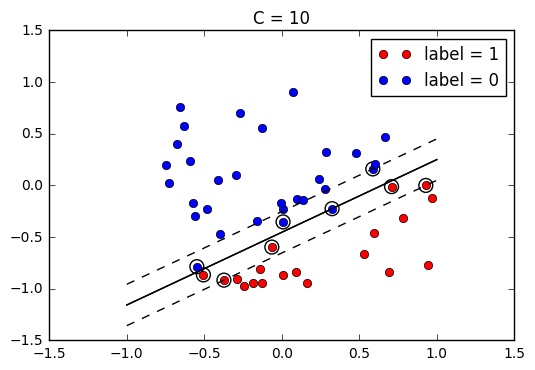

In [85]:
fig3

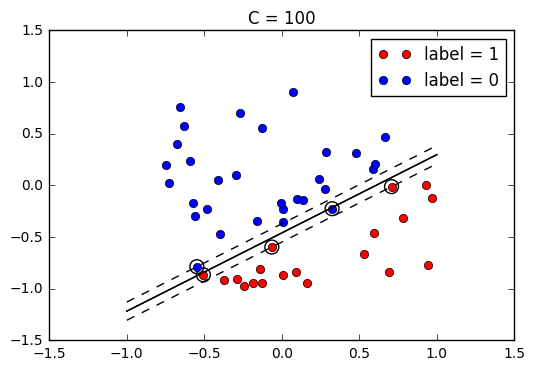

In [90]:
fig4

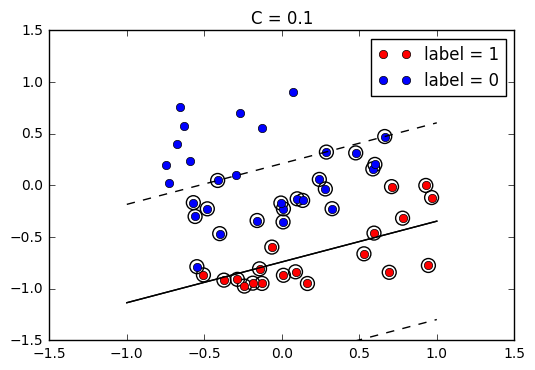

In [91]:
fig5

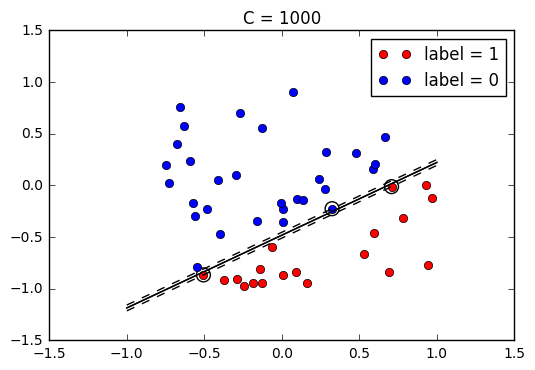

In [95]:
fig6

Beobachtung: Großes C führt zu schmaler Margin mit wenigen Support Vektoren aber ggf Overfitting, da Trainingsdaten innerhalb der Margin hart bestraft werden.

## Gausskernel

In [227]:
def gaussian_kernel(x, y, sigma):
    return np.exp(-sigma*np.linalg.norm(x-y))

In [263]:
C = 10000
gamma = 10.
my_svm = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
my_svm.fit(example_data, example_labels);

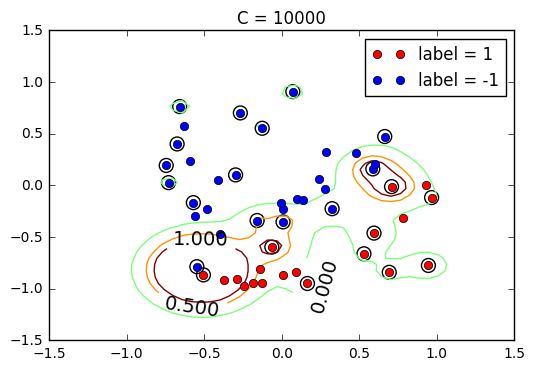

In [264]:
#get decision function
a = my_svm.dual_coef_
b = my_svm.intercept_[0]   #transition of hyperplane
supp_vectors = my_svm.support_vectors_
supp_indices = my_svm.support_   #indices of support vectors
atimeslabels = np.multiply(a, example_labels[supp_indices])

def decision_function(x):
    k = np.array([gaussian_kernel(i, x, gamma) for i in example_data[supp_indices]])
    return np.dot(atimeslabels, k) + b

x = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(x, x)
Z = np.array([[decision_function(np.array([xi, xj])) for xi in x] for xj in x])
Z = np.reshape(Z, (np.shape(Z)[0], np.shape(Z)[1]))
gaussfig1 = plt.figure()
CS = plt.contour(X, Y, Z, levels = [-1, 0, 0.5, 1])
plt.clabel(CS, colors = 'k', fontsize=14)

p1, = plt.plot(label1[:,0], label1[:,1], 'ro', label = 'label = 1')
p2, = plt.plot( label0[:,0], label0[:,1], 'o', label = 'label = -1')
legend = plt.legend(handles = [p1, p2])
plt.scatter(supp_vectors[:,0], supp_vectors[:,1], s=100, facecolors = 'none')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('C = '+str(C))

'''
fig5 = plt.figure()
plt.plot(x, y, 'k-')

#get margin
margin = 1 / np.linalg.norm(w)
#lower_margin = y + m * margin
#upper_margin = y - m * margin
lower_margin = y + np.sqrt(m**2+1)* margin
upper_margin = y - np.sqrt(m**2+1) * margin

plt.plot(x, y, 'k-', x, lower_margin, 'k--', x,upper_margin, 'k--')

#get support vectors
supp_vectors = my_svm.support_vectors_
plt.scatter(supp_vectors[:,0], supp_vectors[:,1], s=100, facecolors = 'none')

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('C = '+str(C))''';

(50, 50)

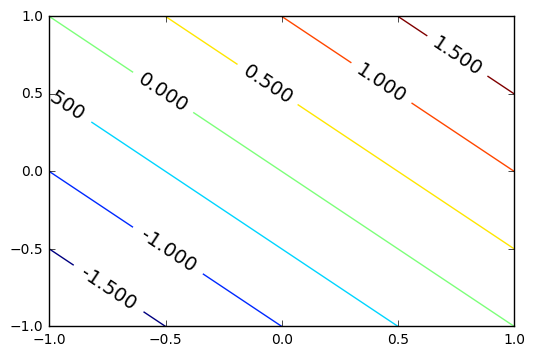

In [178]:
x = np.linspace(-1, 1)
X, Y = np.meshgrid(x, x)
Z = X+Y
P= plt.contour(X, Y, Z)
plt.clabel(P, colors = 'k', fontsize=14)

np.shape(Z)

In [260]:
example_labels[supp_indices], supp_indices

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1]),
 array([12, 13, 18, 23, 24, 26, 29, 35, 41, 49,  8,  9, 15, 28, 31, 44]))

### Error Correcting Output Code, define classifiers

In [46]:
from mySVM_class import *

In [48]:
def ecoc(labeled_data, labels, kernel=scalar_product, penalty=1, list_sigma=[0.1]*15):
    # 
    labels=labels.astype(int);
    l=labeled_data.shape[0];
    num_classifiers=15;
    ecoc_labels=np.zeros(l,15);
    code_words=np.array([
        [ 1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1],
        [-1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1],
        [ 1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1],
        [-1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1],
        [ 1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1],
        [-1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1],
        [ 1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1],
        [-1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1],
        [ 1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1],
        [-1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1]]);
    for j in range(l):
        ecoc_labels[j]=code_words[labels[j]];
    
    list_supp_ind = [];
    list_alpha =[];
    list_b =[];
    list_kernel=[];
    
    for classifier in range(15):
        svm=mySVM(kernel=kernel, penalty=penalty, sigma=list_sigma[classifier]);
        svm.fit(labeled_data, ecoc_labels[:,classifier]);
        list_supp_ind.append(svm.supp_indices);
        list_alpha.append(svm.alpha);
        list_b.append(svm.b);
        list_kernel.append(self.kernel);
        
    # pickle dump / pickle load (?) to save and call saved objects    
    
    # now I need to call a binary classifier for each column of ecoc_labels
    # from decision functions we get seperating hyperplanes, margin, ... 
    # return those
    
    
    return ecoc_labels, list_supp_ind, list_alpha, list_b, list_kernel;

In [49]:
 code_words=np.array([[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1],[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0],
                         [1,0,0,1,0,0,0,1,1,1,1,0,1,0,1],[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1],
                         [1,1,1,0,1,0,1,1,0,0,1,0,0,0,1],[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1],
                         [1,0,1,1,1,0,0,0,0,1,0,1,0,0,1],[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1],
                         [1,1,0,1,0,1,1,0,0,1,0,0,0,1,1],[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1]]);
code_words=2*code_words-1

In [50]:
# suppose we have an unlabeled data point
def predict_ecoc(unlabeled_data, labeled_data, ecoc_labels, list_supp_ind, list_alpha, list_b, list_kernel):
    # every row is one data point
    # number of rows = # of data points
    l=unlabeled_data.shape[0];
    
    new_labels=np.zeros(l,15);
    
    temp_label_ind=[];
    final_labels = np.array(['NaN']*l);
    
    for classifier in range(15):
        a_supp = list_alpha[classifier][list_supp_ind[classifier]];
        ecoc_labels_supp = ecoc_labels[list_supp_ind[classifier],classifier]
        a_times_labels=np.multiply(a_supp, ecoc_labels_supp)
        
        for i in range(l):
            # i_th row of kernel matrix k
            k=np.array([list_kernel[classifier](unlabeled_data[i],y) for y in labeled_data[list_supp_ind[classifier]]])
            
            # list of lists with 15 entries, one per classifier
            new_labels[i][classifier]=np.sgn(np.dot(a_times_labels,k)+list_b[classifier]);
    
        
    for i in range(l):
        ham_dist = [hamming(new_labels[i], codewords[j]) for j in range(10)]
        temp_label_ind = [j for j in range(len(ham_dist)) if ham_dist[j] == min(ham_dist)]
        if length(index_min_ham_dist)!=1:
            print("Attention, data point could not be uniquely classified, index " 
                  + str(i) + "possible classification" + str(temp_label_ind));
        else:
            final_labels[i] = ham_dist.index(min(ham_dist));
        
   
    return final_labels;
    

In [16]:
[0.1]*10

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [22]:
hamming([1,0,0,0], [0,1,0,0])

0.5

In [39]:
i=1;
print("Attention, data point could not be uniquely classified, data_point: " 
                  + str(i) + ", possible classifications: " + str(temp_label_ind));

Attention, data point could not be uniquely classified, data_point: 1, possible classifications: [1, 2]


In [33]:
indices = [i for i, x in enumerate(ham_dist) if x == min(ham_dist)]
indices

[1, 2]

In [35]:
temp_label_ind = [j for j in range(len(ham_dist)) if ham_dist[j] == min(ham_dist)]
temp_label_ind

[1, 2]